In [13]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [14]:
model_path = '/users/Stathis/GoogleDrive/Garbage/'
nets =  list(filter(lambda x: os.path.isdir(os.path.join(model_path, x)), os.listdir(model_path)))
nets = [a for a in nets if 'transfer' in a]
nets.sort()
nets

['transfer_densenet121_10_layers',
 'transfer_densenet121_12_layers',
 'transfer_densenet121_14_layers',
 'transfer_densenet121_all_layers',
 'transfer_densenet121_last_layer',
 'transfer_resnet56_10_layers',
 'transfer_resnet56_12_layers',
 'transfer_resnet56_14_layers',
 'transfer_resnet56_all_layers',
 'transfer_resnet56_all_layers_1',
 'transfer_resnet56_last_layer']

In [15]:
summaries = {}
test_results ={}
for net in nets:
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    summaries[net] = data_train
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_results[net] = data_train

In [17]:
order = ['last_layer', '10_layers', '12_layers', '14_layers', 'all_layers']

In [28]:
resnet = []
densenet = []
for o in order:
    resnet.append(test_results['transfer_resnet56_'+o]['test_acc'][0])
    densenet.append(test_results['transfer_densenet121_'+o]['test_acc'][0])

In [31]:
resnet

[0.7168710443037974,
 0.8894000000000001,
 0.8939000000000001,
 0.904,
 0.9165348101265824]

In [30]:
densenet

[0.8238726265822784, 0.9258, 0.9292999999999998, 0.926, 0.9508504746835444]

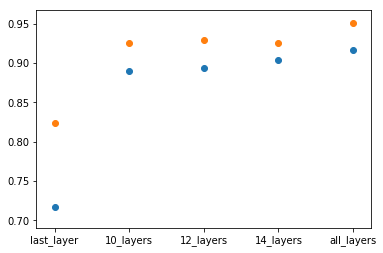

In [34]:
plt.scatter(x=order, y=resnet)
plt.scatter(x=order, y=densenet)